In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
i = 1
names = []
tempK = []
humidE = []
clouds = []
windS = []
lats_API = []
for city in cities:
    try:
        base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=62e05ae2a7369cba4dd7a12c426a703c"
        response = requests.get(base_url)
        places_data = response.json()
        #pprint.pprint(places_data)
        print(f"Processing Record {i} of Set 1 | {places_data['name']}")
        i += 1
        tempK.append(places_data['main']['temp'])
        humidE.append(places_data['main']['humidity'])
        clouds.append(places_data['clouds']['all'])
        windS.append(places_data['wind']['speed'])
        names.append(places_data['name'])
        lats_API.append(places_data['coord']['lat'])
    except:
        pass

Processing Record 1 of Set 1 | Cabo San Lucas
Processing Record 2 of Set 1 | Northam
Processing Record 3 of Set 1 | Albany
Processing Record 4 of Set 1 | Pitimbu
Processing Record 5 of Set 1 | Busselton
Processing Record 6 of Set 1 | Hobart
Processing Record 7 of Set 1 | Grand Island
Processing Record 8 of Set 1 | Barrow
Processing Record 9 of Set 1 | Bud
Processing Record 10 of Set 1 | Ilulissat
Processing Record 11 of Set 1 | Horsham
Processing Record 12 of Set 1 | Port Augusta
Processing Record 13 of Set 1 | Ushuaia
Processing Record 14 of Set 1 | Atuona
Processing Record 15 of Set 1 | Nortelandia
Processing Record 16 of Set 1 | New Norfolk
Processing Record 17 of Set 1 | Camalu
Processing Record 18 of Set 1 | Beloha
Processing Record 19 of Set 1 | Cape Town
Processing Record 20 of Set 1 | Khasan
Processing Record 21 of Set 1 | Saskylakh
Processing Record 22 of Set 1 | Punta Arenas
Processing Record 23 of Set 1 | Hasilpur
Processing Record 24 of Set 1 | Cikampek
Processing Record 25

Processing Record 197 of Set 1 | Yerofey Pavlovich
Processing Record 198 of Set 1 | Chernyshevskiy
Processing Record 199 of Set 1 | Hasaki
Processing Record 200 of Set 1 | Pevek
Processing Record 201 of Set 1 | Gawler
Processing Record 202 of Set 1 | Narsaq
Processing Record 203 of Set 1 | Chuy
Processing Record 204 of Set 1 | Pathein
Processing Record 205 of Set 1 | Katsuura
Processing Record 206 of Set 1 | Madison
Processing Record 207 of Set 1 | Chanika
Processing Record 208 of Set 1 | Asamankese
Processing Record 209 of Set 1 | Salou
Processing Record 210 of Set 1 | Grand Gaube
Processing Record 211 of Set 1 | Bandarbeyla
Processing Record 212 of Set 1 | Aklavik
Processing Record 213 of Set 1 | Inuvik
Processing Record 214 of Set 1 | Tecoanapa
Processing Record 215 of Set 1 | Ocho Rios
Processing Record 216 of Set 1 | Zhigansk
Processing Record 217 of Set 1 | Puerto del Rosario
Processing Record 218 of Set 1 | Nerchinskiy Zavod
Processing Record 219 of Set 1 | Coos Bay
Processing R

Processing Record 391 of Set 1 | Mecca
Processing Record 392 of Set 1 | Humaita
Processing Record 393 of Set 1 | Ilhabela
Processing Record 394 of Set 1 | Provideniya
Processing Record 395 of Set 1 | Vestmanna
Processing Record 396 of Set 1 | Ariquemes
Processing Record 397 of Set 1 | Alamogordo
Processing Record 398 of Set 1 | Viedma
Processing Record 399 of Set 1 | Erenhot
Processing Record 400 of Set 1 | Altamira
Processing Record 401 of Set 1 | San Felipe
Processing Record 402 of Set 1 | Puerto Colombia
Processing Record 403 of Set 1 | Madarounfa
Processing Record 404 of Set 1 | Bejar
Processing Record 405 of Set 1 | Olinda
Processing Record 406 of Set 1 | Nouadhibou
Processing Record 407 of Set 1 | Saint-Georges
Processing Record 408 of Set 1 | Stromness
Processing Record 409 of Set 1 | Codrington
Processing Record 410 of Set 1 | Tautira
Processing Record 411 of Set 1 | Chimbote
Processing Record 412 of Set 1 | Noumea
Processing Record 413 of Set 1 | Nago
Processing Record 414 of 

In [4]:
'''names = []
tempF = []
humidE = []
clouds = []
windS = []'''

cityDict = {}
cityDict['names'] = names
cityDict['tempK'] = tempK
cityDict['humidE'] = humidE
cityDict['clouds'] = clouds
cityDict['windS'] = windS
cityDict['lats_API'] = lats_API


city_df = pd.DataFrame(cityDict)

city_df.head()

,names,tempK,humidE,clouds,windS,lats_API
0,Cabo San Lucas,298.15,47,40,4.10,22.89
1,Northam,274.31,100,75,1.00,51.04
2,Albany,279.73,51,40,3.10,42.65
3,Pitimbu,299.15,94,75,2.10,-7.47
4,Busselton,293.71,98,0,7.82,-33.64


<function matplotlib.pyplot.show(*args, **kw)>

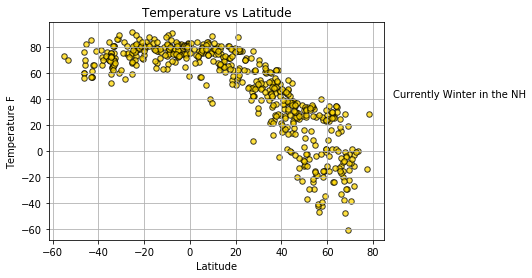

In [21]:
'''cityDict['names'] = names
cityDict['tempK'] = tempK
cityDict['humidE'] = humidE
cityDict['clouds'] = clouds
cityDict['windS'] = windS
cityDict['lats_API'] = lats_API'''

city_lats_API = cityDict['lats_API'] #x-value
city_tempK = cityDict['tempK'] #y-value
city_tempF = []

for temps in city_tempK:
    city_tempF.append(((temps - 273.15) * 1.8) + 32)

# Build the scatter plots
plt.scatter(city_lats_API, city_tempF, marker="o",
            facecolors="gold", 
            edgecolors="black",
            s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.grid(b=True, which='major', axis='both')

# Incorporate a text label
plt.text(0.92, 0.62, 
         "Currently Winter in the NH", 
         fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('TemperatureVsLat.pdf', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

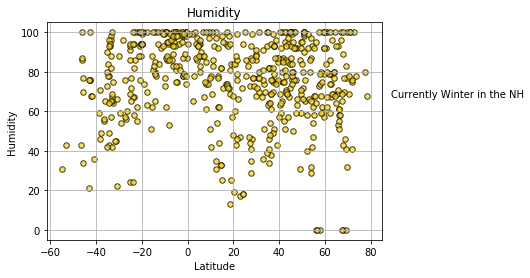

In [22]:
'''cityDict['names'] = names
cityDict['tempK'] = tempK
cityDict['humidE'] = humidE
cityDict['clouds'] = clouds
cityDict['windS'] = windS
cityDict['lats_API'] = lats_API'''

city_lats_API = cityDict['lats_API'] #x-value
city_hum = cityDict['humidE'] #y-value

# Build the scatter plots
plt.scatter(city_lats_API, city_hum, marker="o",
            facecolors="gold", 
            edgecolors="black",
            s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which='major', axis='both')

# Incorporate a text label
plt.text(0.92, 0.62, 
         "Currently Winter in the NH", 
         fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('HumidityVsLat.pdf', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

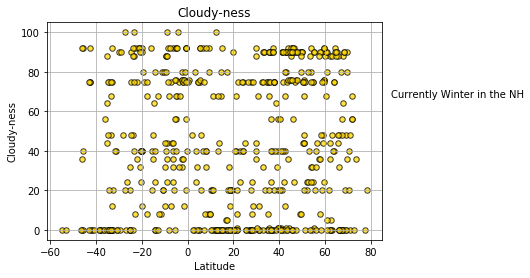

In [23]:
'''cityDict['names'] = names
cityDict['tempK'] = tempK
cityDict['humidE'] = humidE
cityDict['clouds'] = clouds
cityDict['windS'] = windS
cityDict['lats_API'] = lats_API'''

city_lats_API = cityDict['lats_API'] #x-value
city_cloudy = cityDict['clouds'] #y-value

# Build the scatter plots
plt.scatter(city_lats_API, city_cloudy, marker="o",
            facecolors="gold", 
            edgecolors="black",
            s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("Cloudy-ness")
plt.xlabel("Latitude")
plt.ylabel("Cloudy-ness")
plt.grid(b=True, which='major', axis='both')

# Incorporate a text label
plt.text(0.92, 0.62, 
         "Currently Winter in the NH", 
         fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('Cloudy-nessVsLat.pdf', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

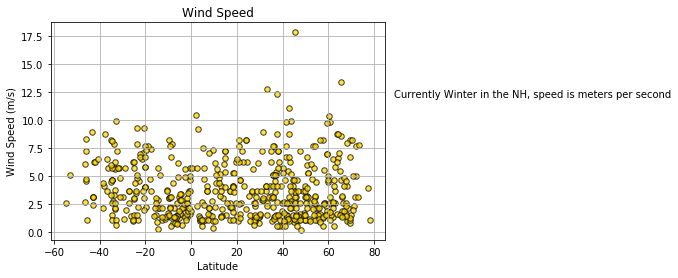

In [26]:
'''cityDict['names'] = names
cityDict['tempK'] = tempK
cityDict['humidE'] = humidE
cityDict['clouds'] = clouds
cityDict['windS'] = windS
cityDict['lats_API'] = lats_API'''

city_lats_API = cityDict['lats_API'] #x-value
city_winds = cityDict['windS'] #y-value

# Build the scatter plots
plt.scatter(city_lats_API, city_winds, marker="o",
            facecolors="gold", 
            edgecolors="black",
            s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(b=True, which='major', axis='both')

# Incorporate a text label
plt.text(0.92, 0.62, 
         "Currently Winter in the NH, speed is meters per second", 
         fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('WindSpeedVsLat.pdf', bbox_inches='tight')
plt.show

In [27]:
'''
The fact that it is currently winter in the northern hemisphere is clearly visible in the TvsLat plot: 
Southern lattitudes are significantly warmer than their Northern equivalent

Cloudiness Seems to have very strong bands at certain percentages (bands at 75% and most of the tens of % are clearly visible), 
this possibly has something to do with how cloudiness is actually determined and the instruments available in remote parts 
of the world (doppler radar is high tech and high maintainance)

The northern hemisphere contains every single outlier (>10 meter per second) for wind speed.

Average humidity (and temperature) peaks at the equator and follows a neat curve down both sides of the tropics. The North and South tropics are practically identical (besides a few cold and dry northern outliers) in both T and Humidity, even mid-winter/summer
'''

'\nThe fact that it is currently winter in the northern hemisphere is clearly visible in the TvsLat plot: \nSouthern lattitudes are significantly warmer than their Northern equivalent\n\nCloudiness Seems to have very strong bands at certain percentages (bands at 75% and most of the tens of % are clearly visible), \nthis possibly has something to do with how cloudiness is actually determined and the instruments available in remote parts \nof the world (doppler radar is high tech and high maintainance)\n\nThe northern hemisphere contains every single outlier (>10 meter per second) for wind speed.\n'